### Seaborn - 고급 그래프
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버전

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
sns.set_style('darkgrid')

<AxesSubplot: xlabel='age', ylabel='fare'>

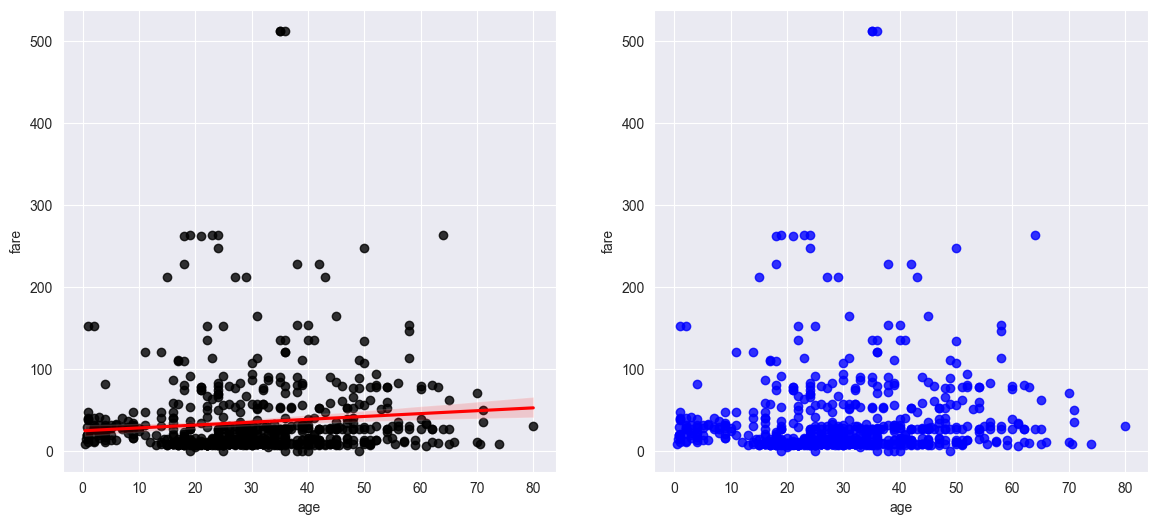

In [5]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시
# 옅은 색깔이 말하는 것이 표준 오차이라고 한다.
sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, # regression line colo
    ax=ax1,
    fit_reg=True # default 가 true임 false이면 회귀선 안보인다. 
)

# 선형회구선 안표시
sns.regplot(
    x='age',
    y='fare',
    data=titanic,
    scatter_kws={'color':'blue'}, # scatter color
    line_kws={'color':'red'}, # regression line colo
    ax=ax2,
    fit_reg=False # default 가 true임 false이면 회귀선 안보인다. 
)


---
### 히스토그램 / 커널 밀도 함수
- 적분하면 1인게 커널 밀도 함수 <br><br>
- 범위를 구할 때 필요하다. 어느 범위에 집중되는지 알기 위해서

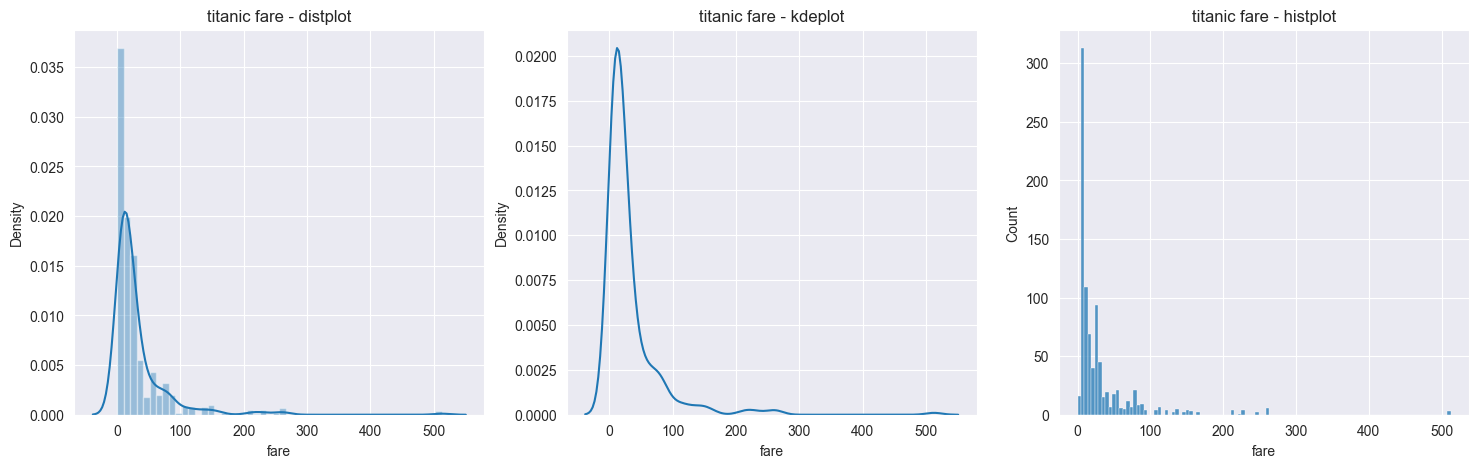

In [6]:
fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot(히스토그램 / 커널밀도)
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot(커널밀도)
sns.kdeplot(x= 'fare',data=titanic,ax=ax2)

# histplot(히스토그램)
sns.histplot(x='fare',data=titanic,ax=ax3)


ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')

plt.show()

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 놓고 데이터를 매트릭스 형태로 분류

In [38]:
table = titanic.pivot_table(index=['sex'],values=['fare'],columns=['class'],aggfunc='count')
table2 = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
#aggfunc='size' : data값이 크기를 기준으로 count해주는 것
print(table)
table2

        fare             
class  First Second Third
sex                      
female    94     76   144
male     122    108   347


class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


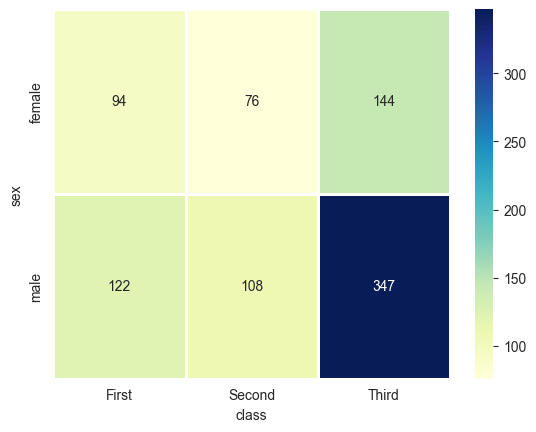

In [25]:
sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=2,cbar=True)

plt.show()

Theme : darkgrid , whitegrid, dark , white , ticks

In [9]:
sns.set_style('whitegrid')

---
### 범주형 데이터의 산점도

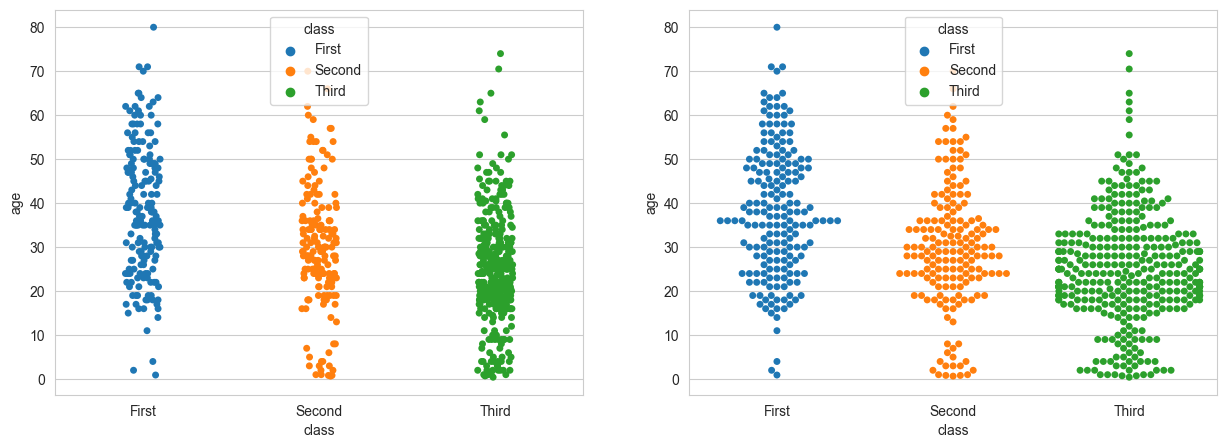

In [10]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x='class',
    y='age',
    hue='class',
    data=titanic,
    ax=ax1,
)

sns.swarmplot(
    x='class',
    y='age',
    hue='class',
    data=titanic,
    ax=ax2
)

plt.show()

---
### 막대그래프

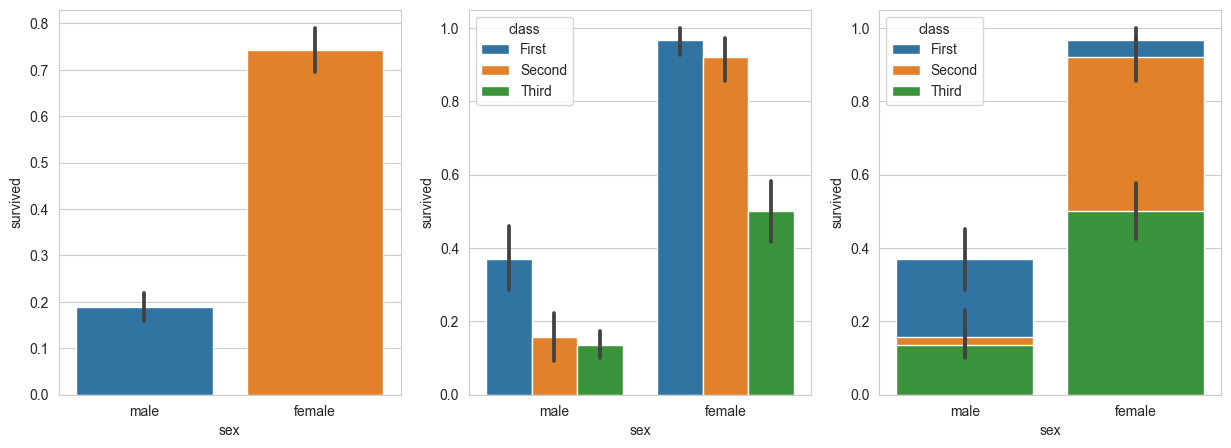

In [41]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1,
)

sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    data=titanic,
    ax=ax2,
)

sns.barplot(
    x='sex',
    y='survived',
    hue='class',
    data=titanic,
    ax=ax3,
    dodge=False
)

plt.show()

In [46]:
pd.pivot_table(titanic,index=['sex'],values=['survived'],columns=['class'],aggfunc=[np.mean,np.var])

mean                           var                    
        survived                      survived                    
class      First    Second     Third     First    Second     Third
sex                                                               
female  0.968085  0.921053  0.500000  0.031229  0.073684  0.251748
male    0.368852  0.157407  0.135447  0.234724  0.133870  0.117439

---
### 빈도 그래프

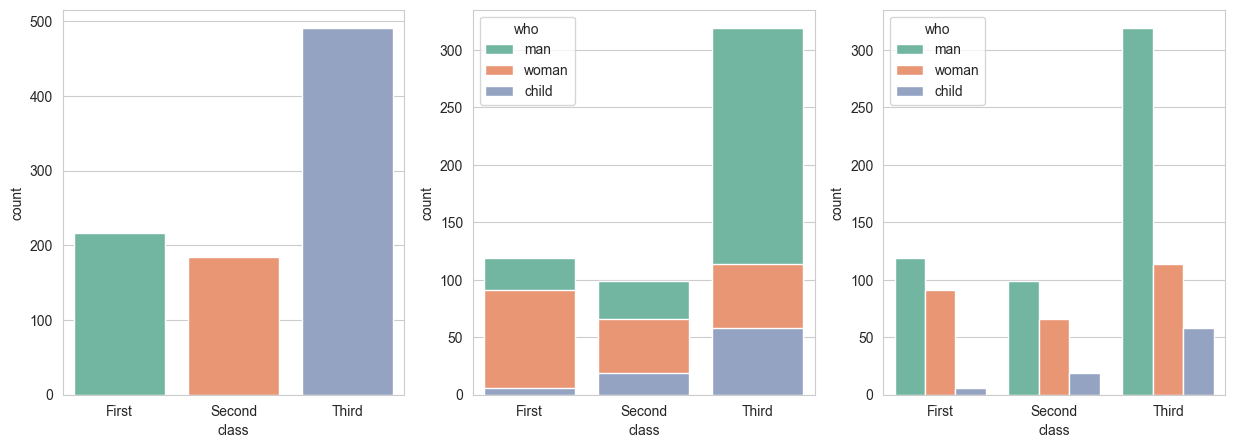

In [12]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(
    x='class',
    data=titanic,
    palette='Set2',
    ax = ax1
)

sns.countplot(
    x='class',
    hue='who',
    palette='Set2',
    dodge=False,
    data=titanic,
    ax = ax2
)

sns.countplot(
    x='class',
    hue='who',
    palette='Set2',
    data=titanic,
    ax = ax3
)

plt.show()

---
### 박스 플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 제공하지만 데이터가 퍼져있는 정도(분산)의 정도를 알기 어렵다. <br><br>

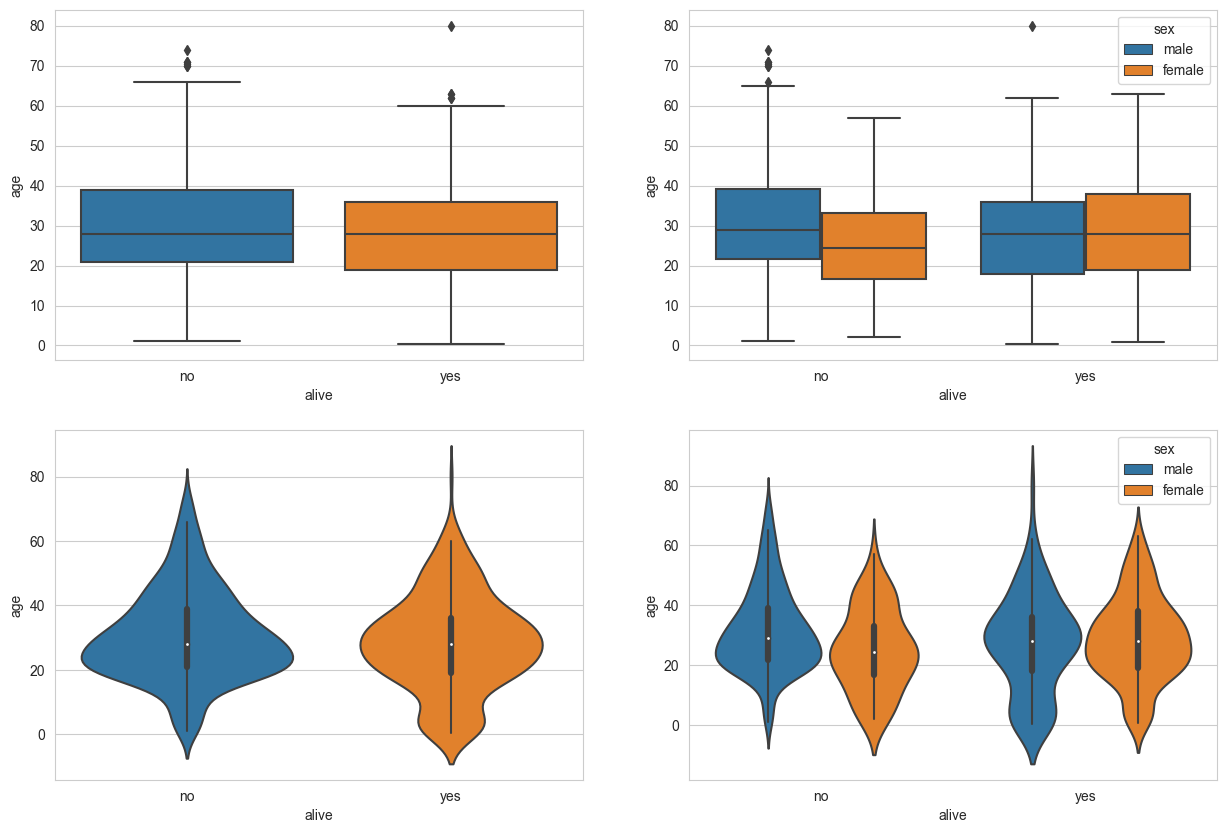

In [53]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스플롯
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1
)

# 박스플롯 + hue
sns.boxplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax2
)

# 바이올린 그래프
sns.violinplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax3
)

sns.violinplot(
    x='alive',
    y='age',
    hue='sex',
    data=titanic,
    ax=ax4
)

plt.show()

---
### 조인트 그래프
- 산점도를 기본으로 하고 각 축에 대한 히스토그램을 동시 제공

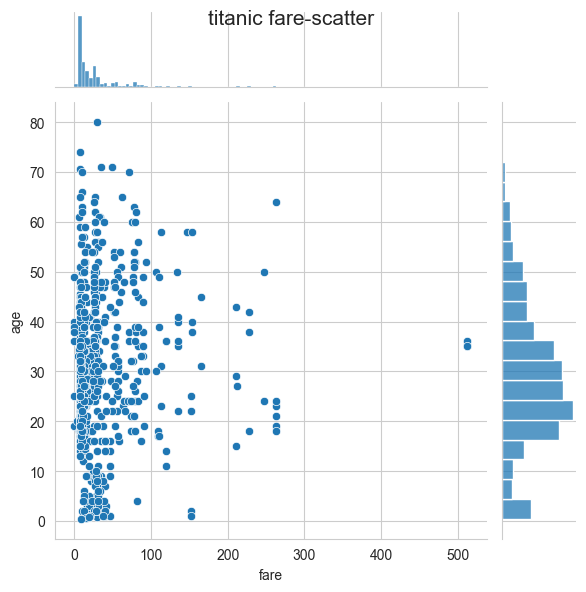

In [14]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x='fare',
    y='age',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter',size=15)

plt.show()

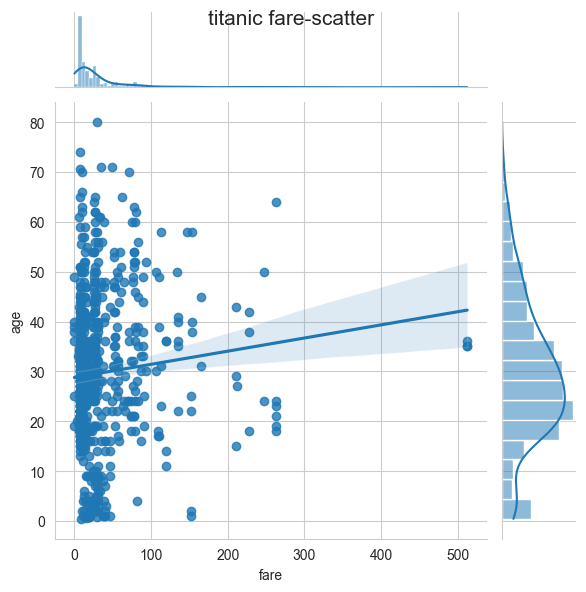

In [15]:
# 조인트 그래프 - 회귀선
j1 = sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter',size=15)

plt.show()

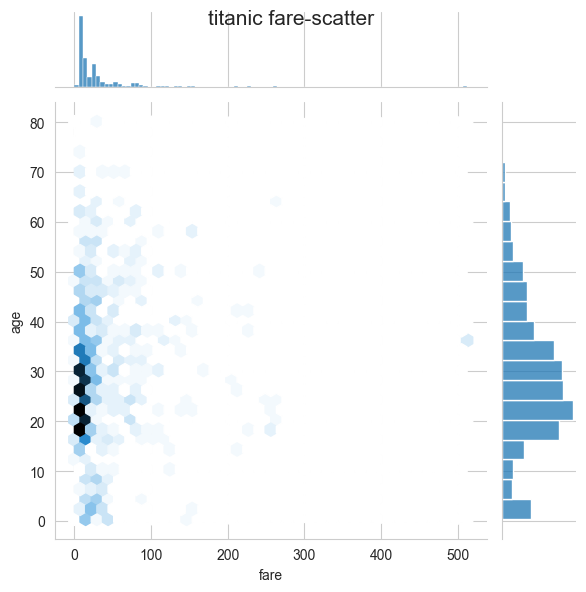

In [16]:
# 조인트 그래프 - 육각그래프
j1 = sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter',size=15)

plt.show()

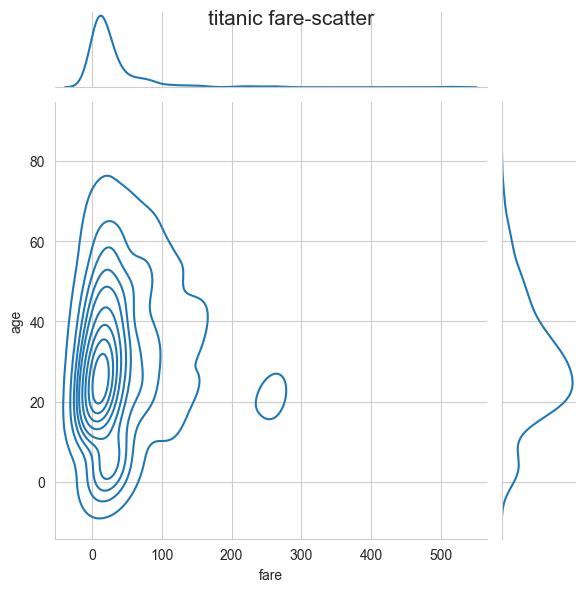

In [17]:
# 조인트 그래프 - 커널 밀집 그래프
j1 = sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter',size=15)

plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

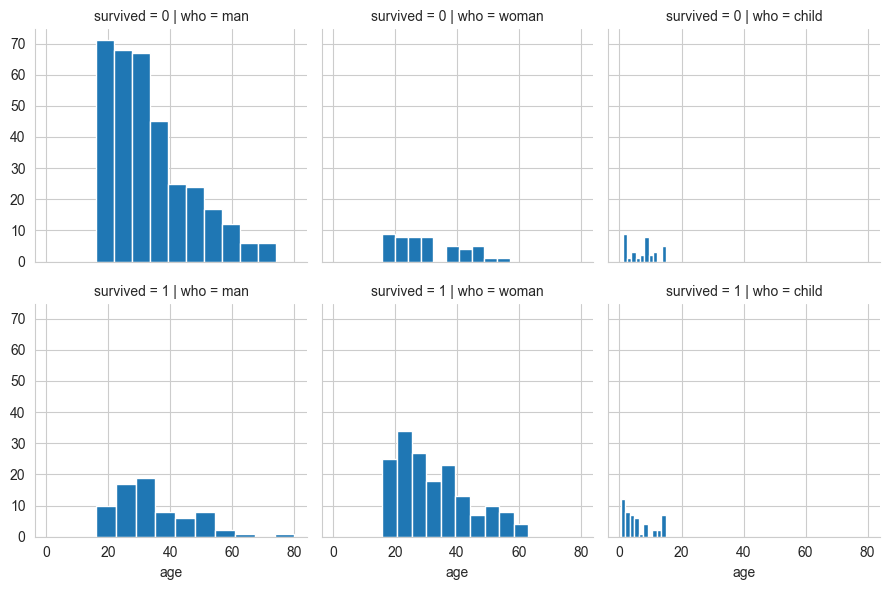

In [58]:
g = sns.FacetGrid(
    data=titanic,
    col='who',
    row='survived'
)

g.map(plt.hist,'age')

---
### 이변수 데이터의 분포
- 매트릭스 형태로 짝을 지어 표현

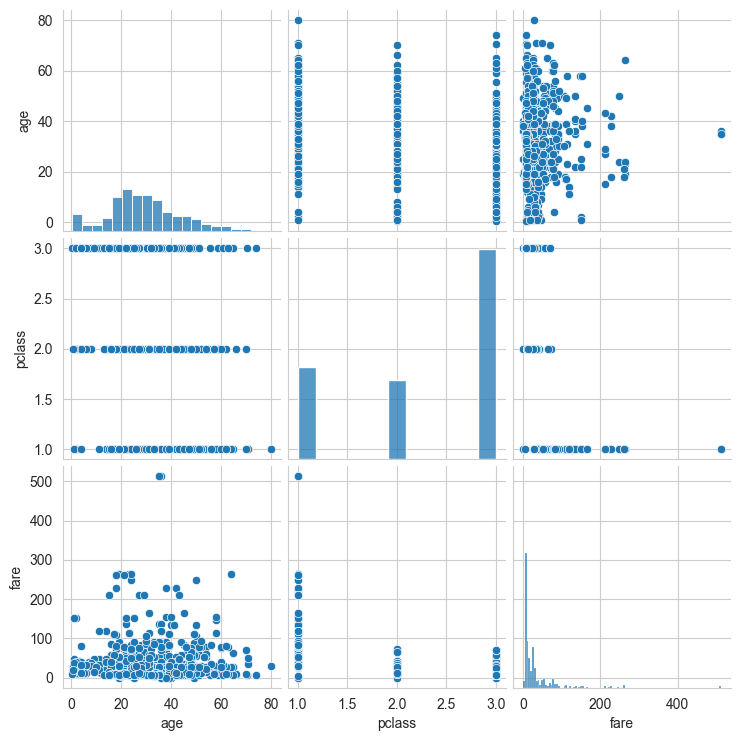

In [19]:
titanic_pair = titanic[['age','pclass','fare']]
sns.pairplot(titanic_pair)